In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('StudentPerformanceFactors.csv')
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [3]:
# Step 1: Handle missing values
# Fill missing values with mode for categorical columns and mean for numeric columns
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna(data[col].mean())

In [4]:
# Step 2: Encode categorical features
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [5]:
# Step 3: Define target and features
# Convert 'Exam_Score' to categorical (e.g., Low, Medium, High)
data['Exam_Score_Category'] = pd.cut(data['Exam_Score'], bins=[0, 65, 75, 101], labels=['Low', 'Medium', 'High'])
X = data.drop(['Exam_Score', 'Exam_Score_Category'], axis=1)
y = data['Exam_Score_Category']

In [6]:
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score,Exam_Score_Category
0,23,84,1,0,0,7,73,1,1,0,...,2,1,2,3,0,1,2,1,67,Medium
1,19,64,1,2,0,8,59,1,1,2,...,2,1,0,4,0,0,1,0,61,Low
2,24,98,2,2,1,7,91,2,1,2,...,2,1,1,4,0,2,2,1,74,Medium
3,29,89,1,2,1,8,98,2,1,1,...,2,1,0,4,0,1,1,1,71,Medium
4,19,92,2,2,1,6,65,2,1,3,...,0,1,1,4,0,0,2,0,70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,...,2,1,2,2,0,1,2,0,68,Medium
6603,23,76,0,2,0,8,81,2,1,3,...,0,1,2,2,0,1,2,0,69,Medium
6604,20,90,2,1,1,6,65,1,1,3,...,2,1,0,2,0,2,2,0,68,Medium
6605,10,86,0,0,1,6,91,0,1,2,...,2,0,2,3,0,1,0,0,68,Medium


In [7]:
# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
model = DecisionTreeClassifier(random_state=42, max_depth=4)  # Set max_depth to limit tree size
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [33]:
# Step 6: Evaluate the model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [35]:
# Print results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8295511850731215
Confusion Matrix:
 [[   1    4   11]
 [   0  474  176]
 [   2  145 1170]]
Classification Report:
               precision    recall  f1-score   support

        High       0.33      0.06      0.11        16
         Low       0.76      0.73      0.74       650
      Medium       0.86      0.89      0.88      1317

    accuracy                           0.83      1983
   macro avg       0.65      0.56      0.58      1983
weighted avg       0.82      0.83      0.83      1983



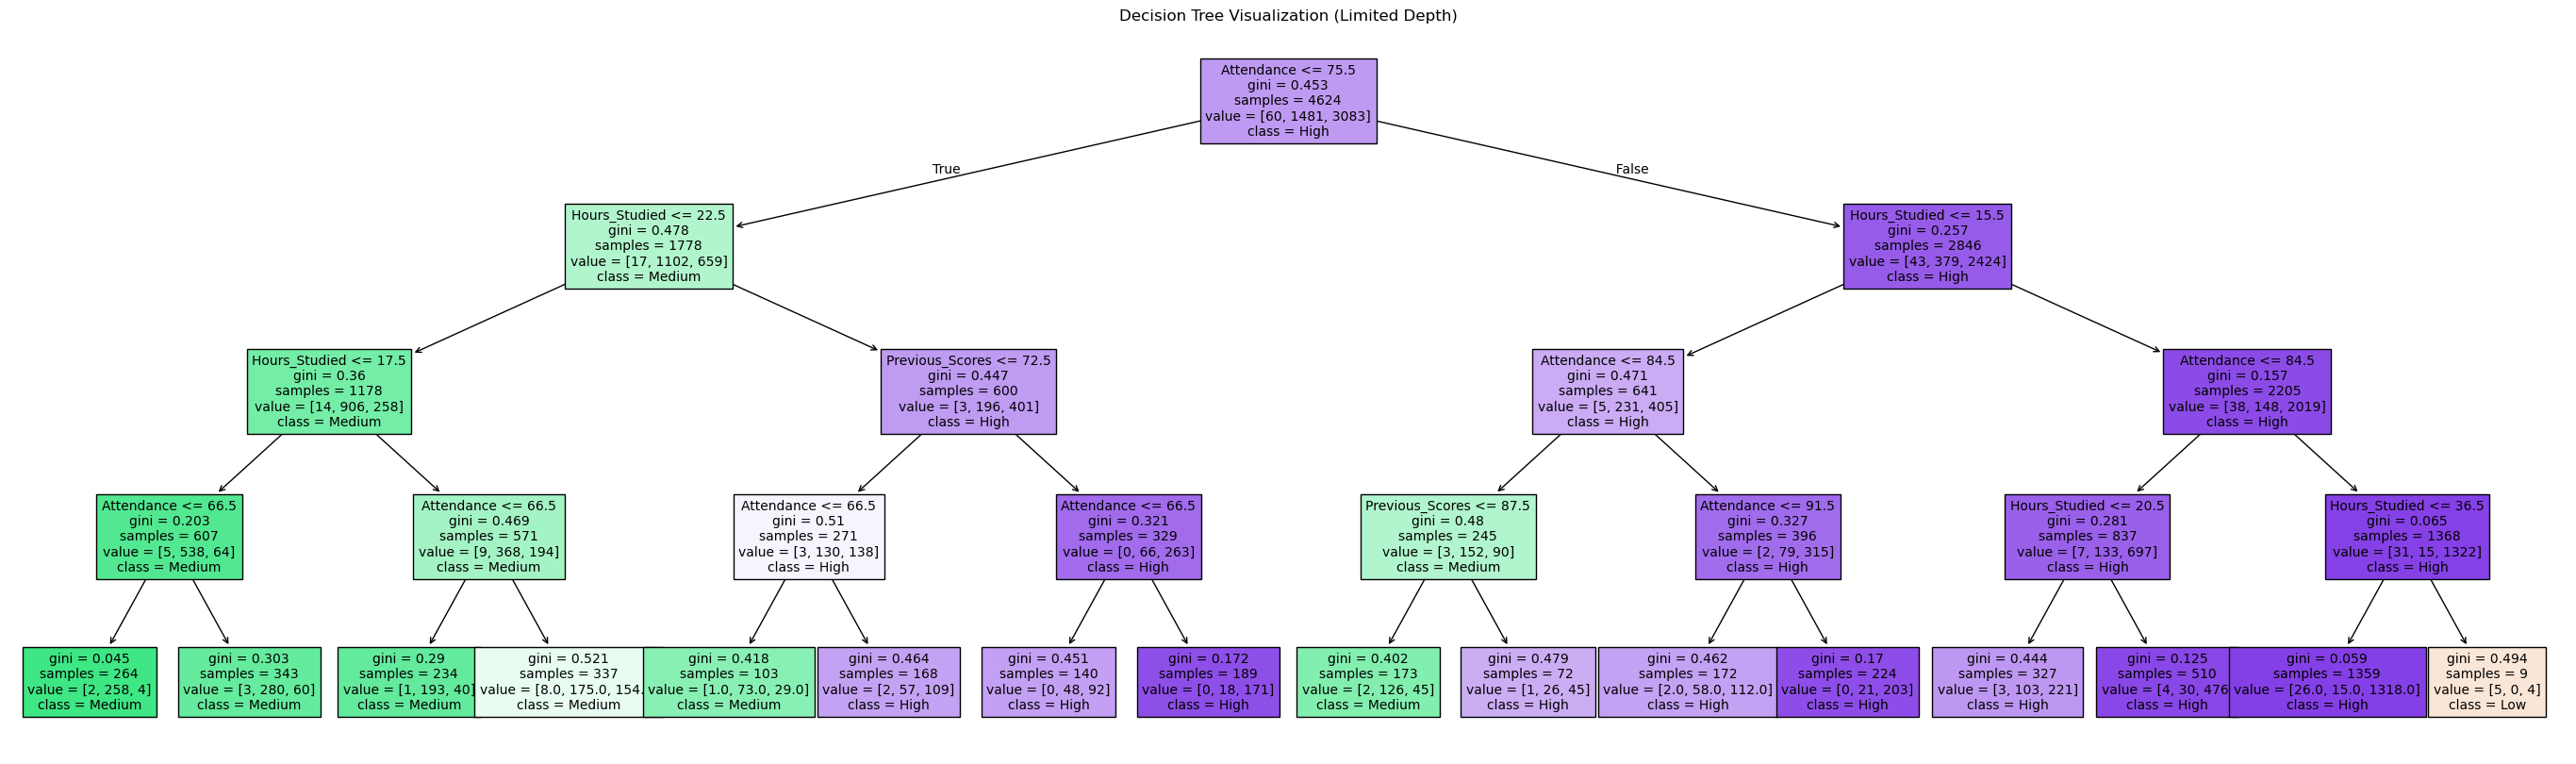

In [47]:
# Visualize the decision tree with limited depth
plt.figure(figsize=(35, 10))
tree.plot_tree(model, feature_names=X.columns, class_names=['Low', 'Medium', 'High'], filled=True, fontsize=10)
plt.title("Decision Tree Visualization (Limited Depth)")
plt.show()

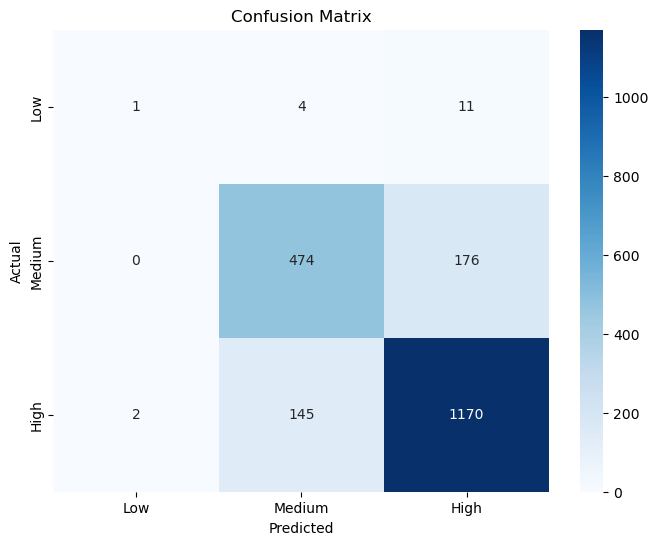

In [49]:
# Step 8: Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
